In this module we have look at color images. First we have a look at RGB image processing and then we have a look at the hue saturation value space (HSV). The latter is a color space that is designed to imitate how we humans perceive the world.

We'll first import the necessary libraries and define some helper functions:

In [1]:
%matplotlib inline

import cv2                      # Library for image processing
import matplotlib.pyplot as plt # Library for plotting
import numpy as np              # Library for numerical processing
from IPython import display     # Library for Jupyter notebooks
from ipywidgets import *        # Include ipywidgets to add some controls to the code
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Set figsize so that images are large enough
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
# Function to show an RGB image
def imshow_rgb(img_bgr):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    
# Function to make colorbars appear nicer
def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax)

# Function to show a RGB image and three separate color channels
def show_rgb_plus_three_channels(img_bgr, ch_0, ch_1, ch_2, name_0, name_1, name_2, 
                                 m_0=255, m_1=255, m_2=255):
    plt.subplot(2,2,1)
    imshow_rgb(img_bgr)
    plt.xticks([])
    plt.yticks([])
    plt.title('Color image')
    plt.subplot(2,2,2)
    plt.xticks([])
    plt.yticks([])
    img2 = plt.imshow(ch_0, cmap='gray', vmin=0, vmax=m_0)
    plt.title(name_0)
    colorbar(img2)
    plt.subplot(2,2,3)
    img3 = plt.imshow(ch_1, cmap='gray', vmin=0, vmax=m_1)
    plt.title(name_1)
    plt.xticks([])
    plt.yticks([])
    colorbar(img3)
    plt.subplot(2,2,4)
    img4 = plt.imshow(ch_2, cmap='gray', vmin=0, vmax=m_2)
    plt.title(name_2)
    plt.xticks([])
    plt.yticks([])
    colorbar(img4)

---
## The RGB color space
---

In this section, we will review some of the material discussed in the first module about the RGB color space and work on the segmentation of coloured objects. 

The standard representation of color in images is based on three color channels: red (R), green (G), and blue (B). In python, using the openCV library, images are loaded as 3D-matrices, with the following dimensions:

| Dimension id | Description | Number of elements | 
|---|---|---|
| 1 | Rows in the image |  the *height* of the image | 
| 2 | Columns in the image | the *width* of the image |
| 3 | Color channels | 3 |

**NB.** Remember that openCV loads the color channels in the following order: **B, G, R**. To get each individual color channel as a separate image, you can use the following Python code:
```python
channel_red   = img[:,:,2]
channel_green = img[:,:,1]
channel_blue  = img[:,:,0]
```

So, for each pixel there are 3 numbers. These numbers range from 0 to 255, that is, for each entree there are $2^8$ possibilities. With the three color values, we can create $(2^8)^3=2^{24} = 16,777,216$ different colors. With the code below, we will investigate how colors like "yellow", "orange", "purple", etc. are represented in RGB values. You can change the sliders to select the values and observe the color.

__Exercise (find colors):__
* Execute the code below and find the RGB values for the following colors:
  1. Red
  2. Orange
  2. Yellow
  3. Green
  4. Cyan
  5. Blue
  6. Purple
  7. White
  8. Gray
  9. Black

In [ ]:
red_widget = IntSlider(description='Red [0,255]',min=0, max=255, step=5, layout={'width': '800px'})
green_widget = IntSlider(description='Green [0,255]',min=0, max=255, step=5, layout={'width': '800px'})
blue_widget = IntSlider(description='Blue [0,255]',min=0, max=255, step=5, layout={'width': '800px'})

def showColor(r, g, b):
    red_channel = r*np.ones((50,200),dtype=np.uint8)
    green_channel = g*np.ones((50,200),dtype=np.uint8)
    blue_channel = b*np.ones((50,200),dtype=np.uint8)
    img_bgr = cv2.merge((blue_channel, green_channel, red_channel))
    imshow_rgb(img_bgr)
    plt.show()

red_widget.value = (255)
green_widget.value = (255)
blue_widget.value = (0)
interact(showColor, r=red_widget, g=green_widget, b=blue_widget)

Let's load a colorful image and inspect the three different color channels.

In [ ]:
# Load the image
path = 'Data_Tutorial4/bellpepper_colors.png'
img_bgr = cv2.imread(path)

# Get the separate color channels
channel_red = img_bgr[:,:,2]
channel_green = img_bgr[:,:,1]
channel_blue = img_bgr[:,:,0]

# Show the image and the three color channels
show_rgb_plus_three_channels(img_bgr, channel_red, channel_green, channel_blue, 'Red', 'Green', 'Blue')

plt.show()

**Exercise (pepper channels)**:
1. Look at the red, orange and yellow bell pepper. Which bell pepper has the highest values for the red color channel? Is this what you expected?
2. Look at the green and yellow bell pepper. Which bell pepper has the highest value for the green channel? Is this what you expected?
3. In reality, each pepper has a uniform color. Do you see uniform intensity values for one of the color channels?

The code below allows you to set lower-bound and upper-bound thresholds on the R, G, and B channels.

**Exercise (color thresholding):**
1. Run the code
2. Try to find thresholds to detect the different peppers individually.

In [ ]:
red_widget = IntRangeSlider(description='Red [0,255]',min=0, max=255, step=1, layout={'width': '800px'})
green_widget = IntRangeSlider(description='Green [0,255]',min=0, max=255, step=1, layout={'width': '800px'})
blue_widget = IntRangeSlider(description='Blue [0,255]',min=0, max=255, step=1, layout={'width': '800px'})

def segmentImageRGB(red_range, green_range, blue_range):
    
    mask_red = np.logical_and(channel_red >= red_range[0], channel_red <= red_range[1])
    mask_green = np.logical_and(channel_green >= green_range[0], channel_green <= green_range[1])
    mask_blue = np.logical_and(channel_blue >= blue_range[0], channel_blue <= blue_range[1])
    mask = np.logical_and(mask_red, mask_green, mask_blue)
    mask = mask.astype(np.uint8)
    
    fig = plt.figure()
    plt.subplot(121)
    imshow_rgb(img_bgr)
    plt.axis('off')
    plt.title('RGB image')
    plt.subplot(122)
    plt.imshow(mask,plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.axis('off')
    plt.title("Segment")
    plt.show()
    fig.tight_layout()


red_widget.value = (100,150)
green_widget.value = (100,150)
blue_widget.value = (100,150)
interact(segmentImageRGB, red_range=red_widget, green_range=green_widget, blue_range=blue_widget)

When you are finished with the exercise, close the widget by pressing the 'x' and the left of the sliders.

---
## Color indices and Excessive Green
---
As you have experienced, segmenting colored objects in the RGB color space can be tricky, as we have to set six thresholds. Moreover, the R value for the red bell pepper was, surprisingly, lower than for the orange and yellow bell pepper. To improve this, it can be beneficial to normalize the color channels and to calculate color indices. Normalization means the each of the values is divided by the sum over all values, such that you get a value that represent the 'redness', 'greenness' and 'blueness' compared to each other.

To normalize the R, G, and B color channels, the values need to be divided by the sum of R, G, and B. 
\begin{equation*}
r \leftarrow \frac{R}{R+G+B}, \\
g \leftarrow \frac{G}{R+G+B}, \\
b \leftarrow \frac{B}{R+G+B}, \\
\end{equation*}

__Exercise (normalized channels):__
* Finish the code below and observe the results. 
* Is the red value for the red, orange and yellow bell pepper now more what you expect?  
* Run the code for the files `Data_Tutorial4/field_shadow.jpg` and `Data_Tutorial4/leaf_shadow.jpg` to see if you can use the normalized RGB values to reduce the effect of shadows.

__NB.__ To properly divide the values, the image matrix is converted to floating-points= values

TypeError: Image data cannot be converted to float

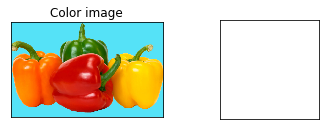

In [3]:
# Load the image
path = 'Data_Tutorial4/bellpepper_colors.png'
img_bgr = cv2.imread(path)

img_bgr_float = img_bgr.astype('float')
R = img_bgr_float[:,:,2]
G = img_bgr_float[:,:,1]
B = img_bgr_float[:,:,0]
R.astype(float)
r = ___
g = ___
b = ___

# Show the original image and the normalized color channels
show_rgb_plus_three_channels(img_bgr, r, g, b, 'Normalized Red', 'Normalized Green', 'Normalized Blue', 1, 1, 1)
plt.show()
# Show the normalized RGB image by merging the three normalized channels
img_bgr_float2 = cv2.merge((b,g,r)).astype('float32')
imshow_rgb(img_bgr_float2)
plt.title('Normalized RGB')
plt.show()

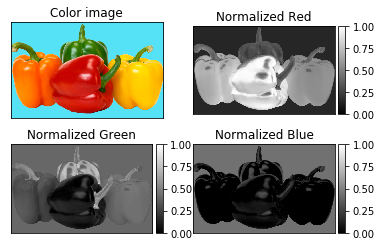

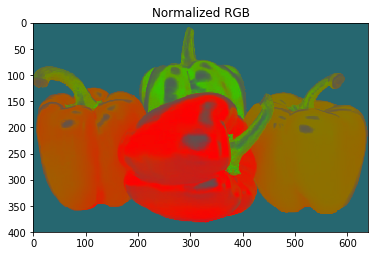

In [4]:
#Solution
# Load the image
path = 'Data_Tutorial4/bellpepper_colors.png'
img_bgr = cv2.imread(path)

img_bgr_float = img_bgr.astype('float')
R = img_bgr_float[:,:,2]
G = img_bgr_float[:,:,1]
B = img_bgr_float[:,:,0]
R.astype(float)
r = R/(R+G+B)
g = G/(R+G+B)
b = B/(R+G+B)

# Show the original image and the normalized color channels
show_rgb_plus_three_channels(img_bgr, r, g, b, 'Normalized Red', 'Normalized Green', 'Normalized Blue', 1, 1, 1)
plt.show()
# Show the normalized RGB image by merging the three normalized channels
img_bgr_float2 = cv2.merge((b,g,r)).astype('float32')
imshow_rgb(img_bgr_float2)
plt.title('Normalized RGB')
plt.show()

### The Excessive Green index 

For particular problems, people have developed specific color indices, specific transformations of RGB values to a single value. The **Excessive-Green** index is such a color index that is often used for agricultural applications. Specifically, the index is used for vegetation segmentation, the segmentation of plants from the background.

The excessive-green value is calculated from the normalized red, green and blue values:
\begin{equation*}
ExG = 2g - r - b
\end{equation*}

**Exercise (ExG bounds)**:
1. What are the upper and lower bounds of  $ExG$, that is, what is the maximum value ExG can attain and what is the minimum value?

The code below calculates an excessive-*red* index and applies that to an image of bell peppers on a plant.

**Exercise (Calculate ExG)**:
1. Create a separate function `calc_exgreen` to calculate the excessive-green index and apply it to some images of a field with crop and weed plants: `Data_Tutorial4/weed_field_01.png`, `Data_Tutorial4/weed_field_02.png`, `Data_Tutorial4/weed_field_03.png` and `Data_Tutorial4/weed_field_04.png`

__hint__: You can use the code below, that calculates excessive red as example.

In [ ]:
#Function to calculate the excessive green
def calc_exgreen(img_bgr):
    # Convert to floating-point representation instead of uint8 to deal with fractions and negative values
    img_bgr_float = img_bgr.astype('float')
    R = img_bgr_float[:,:,2]
    G = img_bgr_float[:,:,1]
    B = img_bgr_float[:,:,0]
    R.astype(float)
    r = R / (R+G+B)
    g = G / (R+G+B)
    b = B / (R+G+B)
    return(2*g-r-b)

# Read an image of a field with vegetation
path = 'Data_Tutorial4/paprika_in_kas.jpg'
img_bgr = cv2.imread(path)

# Calculate an image with excessive-green values
img_exg = calc_exgreen(img_bgr)

# Plot the images
plt.subplot(1,2,1)
img1 = imshow_rgb(img_bgr)
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2)
img2 = plt.imshow(img_exg)
plt.xticks([]),plt.yticks([])
colorbar(img2)
plt.show()

**Exercise (ExG thresholding)**:
1. Find the thresholds to separate vegetation from soil

In [ ]:
exg_range_widget = FloatRangeSlider(description='ExG',min=-2, max=2, step=0.05, layout={'width': '800px'})
img_exg = calc_exgreen(cv2.imread('Data_Tutorial4/weed_field_01.png'))


def segmentExGreen(exg_range):
    mask = np.logical_and(img_exg >= exg_range[0], img_exg <= exg_range[1])
    mask = mask.astype(np.uint8)
    
    fig = plt.figure()
    plt.subplot(121)
    img1 = plt.imshow(img_exg)
    plt.axis('off')
    plt.title('RGB image')
    colorbar(img1)
    plt.subplot(122)
    plt.imshow(mask,plt.get_cmap('gray'), vmin=0, vmax=1)
    
    plt.title("Segment")
    plt.show()
    fig.tight_layout()
    
interact(segmentExGreen, exg_range=exg_range_widget)

---
## HSV color space
---

The disadvantage of the RGB-color space is that color and intensity information are intertwined. **Hue-Saturation-_Value_** (HSV) color space is a color space with which you can adjust the intensity seperatly. In this section we investigate this space in depth. 

The image below visualizes the RGB color space and the HSV color spaces. You can see that in the HSV space, chromatic information is represented by the Hue and Saturation dimensions and achromatic information is represented by the Value.
<img src="Data_Tutorial4/rgbhsv.jpg" />

**Exercise (HSV peppers)**: 
1. Looking at the bell-pepper image. What is the advantage of using the HSV color space if you want to segment the different bell peppers?


<!---
Conversion from RGB to HSV is done as follows:

\begin{equation*}
V \leftarrow \text{max}(R,G,B)\\
\Delta V \leftarrow V-\text{min}(R,G,B)\\
S \leftarrow    
\begin{cases}
    \frac{\Delta V}{V} & \text{if } V \neq 0	\\
    0 & \text{otherwise}	\\
\end{cases}\\
H \leftarrow
\begin{cases}
60(G-B)/\Delta V & \text{if } V=R\\
120 + 60(B-R)/\Delta V & \text{if } V=G\\
240 + 60(R-G)/\Delta V & \text{if } V=B\\
\end{cases}\\
\end{equation*}
--->


Conversions between different color spaces can be done using the openCV function:

<center>```python img_out = cv2.cvtColor(img_in, conversion_type)``` </center>

For BGR $\leftrightarrow$ HSV conversion: ```python conversion_type = cv2.COLOR_BGR2HSV```.  
For HSV $\leftrightarrow$ BGR conversion: ```python conversion_type = cv2.COLOR_HSV2BGR```.  

When the images are represented using 8-bit unsigned integers (as we currently do), the values are:
\begin{equation*}
0 \leq H \leq 180\\
0 \leq S \leq 255\\
0 \leq V \leq 255\\
\end{equation*}
**NB.** Normally Hue is represented as an angle, so $0 \leq H \leq 360$, but as that does not fit in an 8-bit representation, $H \leftarrow H/2$ is used.

Let's convert the image of the bell pepper to the HSV-color space and inspect the three color channels.  
**NB.** in the code below, we focus on Hue values from 0 to 80 to make the colors of the bell peppers more apparent. Larger values are displayed as white

In [ ]:
# Read the image
path = 'Data_Tutorial4/bellpepper_colors.png'
img_bgr = cv2.imread(path)

# Convert BGR to HSV
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# Take the separate HSV-channels
channel_hue = img_hsv[:,:,0]
channel_sat = img_hsv[:,:,1]
channel_val = img_hsv[:,:,2]

# Show the image plus the three color channels
show_rgb_plus_three_channels(img_bgr, channel_hue, channel_sat, channel_val, 'Hue', 'Saturation', 'Value', 80, 255, 255)

**Exercise (hue issues)**:
1. What do you notice looking at the Hue channel?  
2. Do you see something special on the red bell pepper? Can you explain it?

The code below allows you to segment objects in the image using a minimum threshold ($h_{\text{min}}$) and maximum threshold ($h_{\text{max}}$) on the Hue value. All pixels with $ h_{\text{min}} \leq h < h_{\text{max}}$ are set to true (displayed as white) and to false otherwise (displayed as black).

**Exercise (hue segmentation)**:
1. Run the code below and use the sliders for the min and max threshold. Search for the threshold values to segment the red, orange, yellow, and green bell pepper. Use the image and colorbar of the Hue channel.  
**NB.** The slider allows you to enter **_negative values_**. This is on purpose. As Hue is in angle units, 0&deg; equals 360&deg;. For the 8-bit representation that we use, it means that $H=0$ equals $H=180$. If you enter negative values, it is automatically converted to the corresponding positive value. This allows you to deal with the issue that red colors are separate with Hue values slightly larger than 0 and slightly smaller than 180.

In [ ]:
hue_widget = IntRangeSlider(description='Hue [-30,180)',min=-20, max=180, step=1, layout={'width': '800px'})

def segmentImageHue(hue_range):
    hue_min = hue_range[0] if hue_range[0]>0 else (hue_range[0]+180)
    hue_max = hue_range[1] if hue_range[1]>0 else (hue_range[1]+180)
    
    if(hue_max>hue_min):
        mask = np.logical_and(img_hsv[:,:,0] >= hue_min, img_hsv[:,:,0] < hue_max)
    else:
        mask = np.logical_or(img_hsv[:,:,0] < hue_max, img_hsv[:,:,0] >= hue_min)
        
    mask = mask.astype(np.uint8)

    fig = plt.figure()
    plt.subplot(221)
    imshow_rgb(img_bgr)
    plt.axis('off')
    plt.title('RGB image')
    plt.subplot(222)
    impl = plt.imshow(img_hsv[:,:,0],plt.get_cmap('jet'))
    plt.axis('off')
    plt.title('Hue channel')
    plt.colorbar(impl, fraction=0.030, pad=0.04)
    plt.subplot(223)
    plt.imshow(mask,plt.get_cmap('gray'))
    plt.axis('off')
    plt.title("Segment")
    plt.show()
    fig.tight_layout()

hue_widget.value = (0,50)
interact(segmentImageHue,hue_range=hue_widget)